<a href="https://colab.research.google.com/github/AyozeGS/IABD/blob/main/SNS/UT2/T1/Ayoze_Gil_Sosa_Ejemplo_2_5_Escalamiento_de_datos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Ejemplo 5:** Escalamiento de datos

In [2]:
# LIBRERÍAS EMPLEADAS EN EL EJEMPLO
# Tratamiento de datos
# ==============================================================================
import numpy as np
import pandas as pd
# Gráficos
# ==============================================================================
import matplotlib.pyplot as plt
# Preprocesado
#==============================================================================
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler  # Para el escalamiento Estandarización Z
from sklearn.preprocessing import MinMaxScaler # Para el escalamiento por Rangos
from sklearn.compose import make_column_selector

# Creación del conjunto de datos (dos máquinas embotelladoras)
# ==============================================================================
muA, sigmaA = 1000, 1 # media y desviación estándar embotelladora A
muB, sigmaB = 1000, 4 # media y desviación estándar embotelladora B
datosA = np.random.normal(muA, sigmaA, 1000)
datosB = np.random.normal(muB, sigmaB, 1000)
datos=np.column_stack((datosA, datosB))

# Título: ¿qué es un DataFrame?
#Url: https://datacarpentry.org/python-ecology-lesson-es/02-starting-with-data/#entonces-qu%C3%A9-es-un-dataframe
Data = pd.DataFrame(datos, columns=['Embotelladora_A', 'Embotelladora_B'])

# Escalamiento
# ==============================================================================
# Selección de columnas numéricas
numeric_cols = Data.select_dtypes(include=['float64', 'int']).columns.to_list()
# Standard scaler - Definimos el tipo de escalamientoa realizar: estandarización Z-score
preprocessor_SS = ColumnTransformer(
                   [('scale', StandardScaler(), numeric_cols)],remainder='passthrough')

# MinMaxScaler - Definimos el tipo de escalamiento a realizar: Estandarización por rangos
preprocessor_RR = ColumnTransformer(
                   [('scale', MinMaxScaler(), numeric_cols)],remainder='passthrough')

Data_prep_SS = preprocessor_SS.fit_transform(Data)
Data_prep_RR = preprocessor_RR.fit_transform(Data)
# Nota:
# Se podría aplicar las transformaciones a cualquier conjunto de datos con
# Data_new_prep_SS  = preprocessor_SS.transform(Data_new)
Data_prep_SS_v2  = preprocessor_SS.transform(Data) # Podemos observar que los resultados son los mismos que el método fit_transform

# Título: Diferencia entre fit_transform() y transform() en Scikit-Learn
# Url: https://forum.huawei.com/enterprise/es/diferencia-entre-fit-transform-y-transform-en-scikit-learn/thread/891275-100757

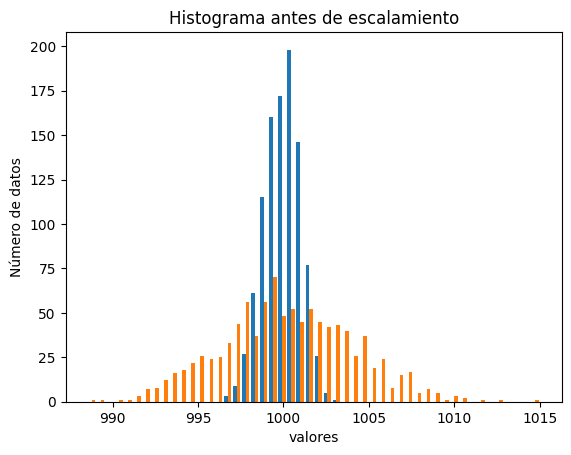

In [3]:
# Histograma antes de escalamiento
plt.hist(Data, 50)
plt.ylabel('Número de datos')
plt.xlabel('valores')
plt.title('Histograma antes de escalamiento')
plt.show()

Representacióón de los datos escalado con **Standard Scaler**
 - Estandariación/Escalamiento por desviación típica


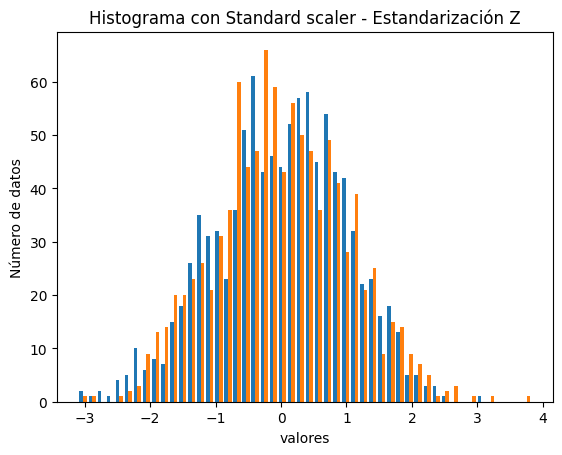

In [4]:
plt.hist(Data_prep_SS, 50)
plt.ylabel('Número de datos')
plt.xlabel('valores')
plt.title('Histograma con Standard scaler - Estandarización Z')
plt.show()

Al utilizar la mediana como medida para realizar el remuestreo por medio del método de Jackknife no se obtiene ningún valor atípico porque estos no son influyentes en su cálculo.

**NOTA** Observar que las **dos** variables tienen la misma desviación típica (s=1)

In [5]:
Data_prep_SS.std()


0.9999999999999999

Representación de los datos escalado con **Min Max Scaler** - Estandariación/Escalamiento por rangos



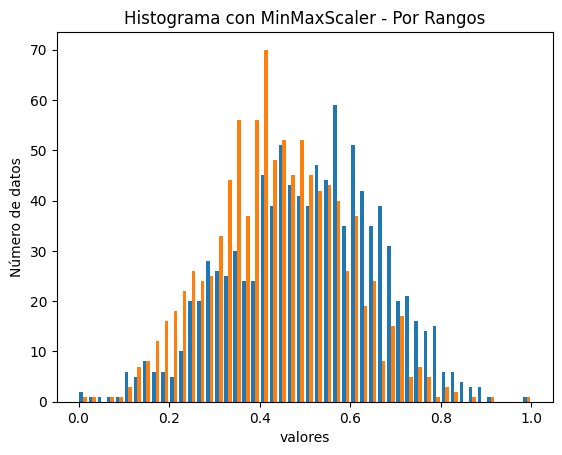

In [6]:
plt.hist(Data_prep_RR, 50)
plt.ylabel('Número de datos')
plt.xlabel('valores')
plt.title('Histograma con MinMaxScaler - Por Rangos')
plt.show()

**NOTA** Observar que las **dos** variables tienen el mismo rango

In [7]:
#Rango
#Data_prep_RR[:,0]
np.max(Data_prep_RR[:,0])-np.min(Data_prep_RR[:,0])

1.0

In [8]:
#Rango
#Data_prep_RR[:,1]
np.max(Data_prep_RR[:,1])-np.min(Data_prep_RR[:,1])

1.0

**Responder a las siguientes preguntas:**

**Considerar que la variable X toma los valores 1,2,3,4,5,6,7,8,9,10. Se pide:**

**a)   ¿Cuánto vale la media, mediana, la desviación estándar muestral, la varianza muestral y el rango de la variable X?**

In [12]:
X = np.arange(1,11)

print("Media =", np.mean(X))
print("Mediana =", np.median(X))
print("Desviación estándar =", np.std(X))
print("Varianza =", np.var(X))
print("Rango =", np.max(X)-np.min(X)) #Se podría usar np.ptp(X)

Media = 5.5
Mediana = 5.5
Desviación estándar = 2.8722813232690143
Varianza = 8.25
Rango = 9


**b)   Utilizar la función describe() de Panda, para obtener la media, desviación estándar, etc…**

In [ ]:
X = pd.DataFrame(X, columns=['X'])
X.describe()

,X
count,10.00000
mean,5.50000
std,3.02765
min,1.00000
25%,3.25000
50%,5.50000
75%,7.75000
max,10.00000


**c)   ¿Por qué el resultado de calcular la desviación estándar con Numpy es diferente a la calculada por describe de Panda? ¿Qué ajuste sería necesario realizar para que los resultados fuesen similares/iguales?**

La razón es porque ambas utilizan distintos grados de libertad para su cálculo.

Numpy calcula por defecto la desviacion estandar de la muestra s sin grados de libertad, de la forma:

$$ s = \sqrt{\frac{\sum_{i=1}^{n} (\overline{x}-x_{i})}{n}} $$

Pandas estima la desviación estándar poblacional de la muestra con un grado de libertad 1, de la forma:

$$ \sigma = \sqrt{\frac{\sum_{i=1}^{n} (\overline{x}-x_{i})}{n-1}} $$


Por lo que su relación es

$$ \sigma^2 = s^2 \frac {n}{n-1} \hspace{1mm};\hspace{5mm}  \sigma = s \sqrt{\frac {n}{n-1}} $$

In [ ]:
#Comprabación de calcular la desviación a partir de la relación explicada
print("Ajuste de desviación ajustada con ecuación:", np.std(X) * np.sqrt(len(X)/(len(X)-1)))

#Calculo de la desviación con grado de libertad 1
print("Ajuste de desviación estándar con parámetro =", np.std(X, ddof=1))

Ajuste de desviación ajustada con ecuación: X    3.02765
dtype: float64
Ajuste de desviación estándar con parámetro = X    3.02765
dtype: float64


**d)   Estandarizar la variable (escalamiento) mediante rangos y a continuación calcular la media y la mediana de la variable escalada.**

In [ ]:
# MinMaxScaler - Definimos el tipo de escalamiento a realizar: Estandarización por rangos
preprocessor_RR = ColumnTransformer(
                   [('scale', MinMaxScaler(), ['X'])],remainder='passthrough')

Data_prep_RR = preprocessor_RR.fit_transform(X)

# Cálculo de la media y la mediana antes de introducir un valor atípico
print("Media =", np.mean(Data_prep_RR))
print("Mediana =", np.median(Data_prep_RR))

Media = 0.5
Mediana = 0.5


**e)   Repetir el apartado anterior con el escalamiento Z - score**

In [ ]:
# Standard scaler - Definimos el tipo de escalamientoa realizar: estandarización Z-score
preprocessor_SS = ColumnTransformer(
                   [('scale', StandardScaler(), ['X'])],remainder='passthrough')

Data_prep_SS = preprocessor_SS.fit_transform(X)

# Cálculo de la media y la mediana antes de introducir un valor atípico
print("Media =", np.mean(Data_prep_SS))
print("Mediana =", np.median(Data_prep_SS))

Media = -6.661338147750939e-17
Mediana = 0.0
